In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
import pickle
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC  
import importlib.util
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve, GridSearchCV

from sklearn.metrics import explained_variance_score, make_scorer
from matplotlib import pyplot as plt


In [2]:
# importing template file 
spec = importlib.util.spec_from_file_location("Template", "/home/admin1/PycharmProjects/ML/Week10/Template/template.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
temp = foo.Template()

In [3]:
# read file
df=temp.read_file('Data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
# checks for null values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
# checks for duplicate values
df.duplicated().sum()

0

In [9]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [10]:
df = df[['Age','EstimatedSalary','Purchased']]

In [11]:
train,test=temp.split(df,0.3)

In [12]:
print("train",train.shape)
print("test",test.shape)

train (280, 3)
test (120, 3)


In [13]:
# saving datasets into csv filesS
temp.save_csv(test,'test_data.csv')
temp.save_csv(train,'train_data.csv')


In [14]:
# loading training data csv file
train_df = temp.read_file('train_data.csv')
train_df.head()

,Age,EstimatedSalary,Purchased
0,37,144000,1
1,41,63000,0
2,43,112000,1
3,59,76000,1
4,23,48000,0


In [15]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=temp.split(train_df,0.3)

In [16]:
# saving cross validation data into csv file
temp.save_csv(cv_data,'cv_data.csv')

In [17]:
size = len(train_data)
cv = KFold(size, shuffle=True)

In [18]:
# separating features and labels of training dataset
x_train=train_data.iloc[:,[0,1]].values
y_train=train_data.iloc[:,2].values


In [19]:
# feature scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [20]:
# fit model
classifier = SVC(kernel='linear',probability=True)  
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
y_pred = classifier.predict(x_train)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [22]:
# making confusion matrix
cm= confusion_matrix(y_train,y_pred)
print(cm)

[[120   6]
 [ 21  49]]


In [23]:
# loading cross validation dataset file
cv_data = temp.read_file('cv_data.csv')
cv_data.head()

,Age,EstimatedSalary,Purchased
0,26,72000,0
1,31,71000,0
2,32,120000,1
3,34,112000,1
4,18,68000,0


In [24]:
# separate labels and features of cross validation dataset
x_cv=cv_data.iloc[:,[0,1]].values
y_cv=cv_data.iloc[:,2].values

In [25]:
# feature scaling
x_cv=sc.fit_transform(x_cv)

train matrix
 [[120   6]
 [ 21  49]]
cv matrix
 [[48  3]
 [16 17]]
Accuracy of train data = 82.61904761904762
Accuracy of test data = 72.81639928698752


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


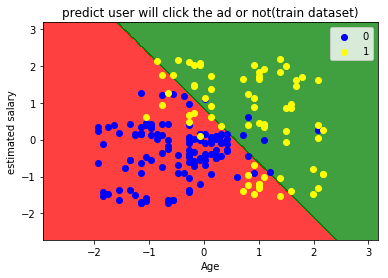

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


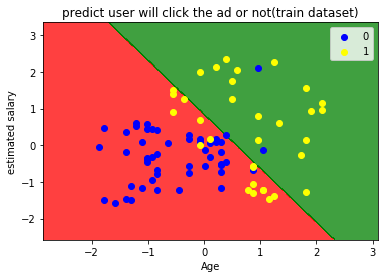

In [26]:
class SupportVector:
    
    def get_predictions(self,x):        
        # getting prediction values
        y_pred = classifier.predict(x)
        return y_pred
    
    def create_confusion_matrix(self,y,y_pred):
        # making confusion matrix
        cm= confusion_matrix(y,y_pred)
        return cm
    
    def get_accuracy(self,y_train,y_pred):
        Accuracy = sklearn.metrics.balanced_accuracy_score(y_train,y_pred)*100
        return Accuracy
        
    def visualize(self,y_pred,x,y):
        # visualizing the training set result
        
        x1,x2=np.meshgrid(np.arange(start=x[:,0].min()-1,stop=x[:,0].max()+1,step=0.01),np.arange(start=x[:,1].min()-1,stop=x[:,1].max()+1,step=0.01 ))
        plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
        plt.xlim(x1.min(),x1.max())
        plt.ylim(x2.min(),x2.max())
        
        for i,j in enumerate(np.unique(y)):
            plt.scatter(x[y==j,0],x[y==j,1],c=ListedColormap(('red','green'))(i),label=j)
        
        plt.title('predict user will click the ad or not(train dataset)')
        plt.xlabel('Age')
        plt.ylabel('estimated salary')
        plt.show()
     
    
    
    
        
def main():
    # creates class object 
    obj = SupportVector()
    y_pred_train = obj.get_predictions(x_train)
    y_pred_test = obj.get_predictions(x_cv)
    
    cm_train=obj.create_confusion_matrix(y_train,y_pred_train)
    print("train matrix\n",cm_train)
    
    cm_cv=obj.create_confusion_matrix(y_cv,y_pred_test)
    print("cv matrix\n",cm_cv)
    
    acc_train = obj.get_accuracy(y_train,y_pred_train)
    print("Accuracy of train data =",acc_train)
    
    acc_test = obj.get_accuracy(y_cv,y_pred_test)
    print("Accuracy of test data =",acc_test)
    
    if acc_train >= 70 and acc_test >=  60:
        fileObject = open("train_data.pkl",'wb')
        pickle.dump(classifier,fileObject)   
        pickle.dump(sc,fileObject)
        # here we close the fileObject
        fileObject.close()

    temp.visualization(y_pred_train,x_train,y_train,classifier)
    temp.visualization(y_pred,x_cv,y_cv,classifier)
    
    
if __name__ == '__main__':
    main()

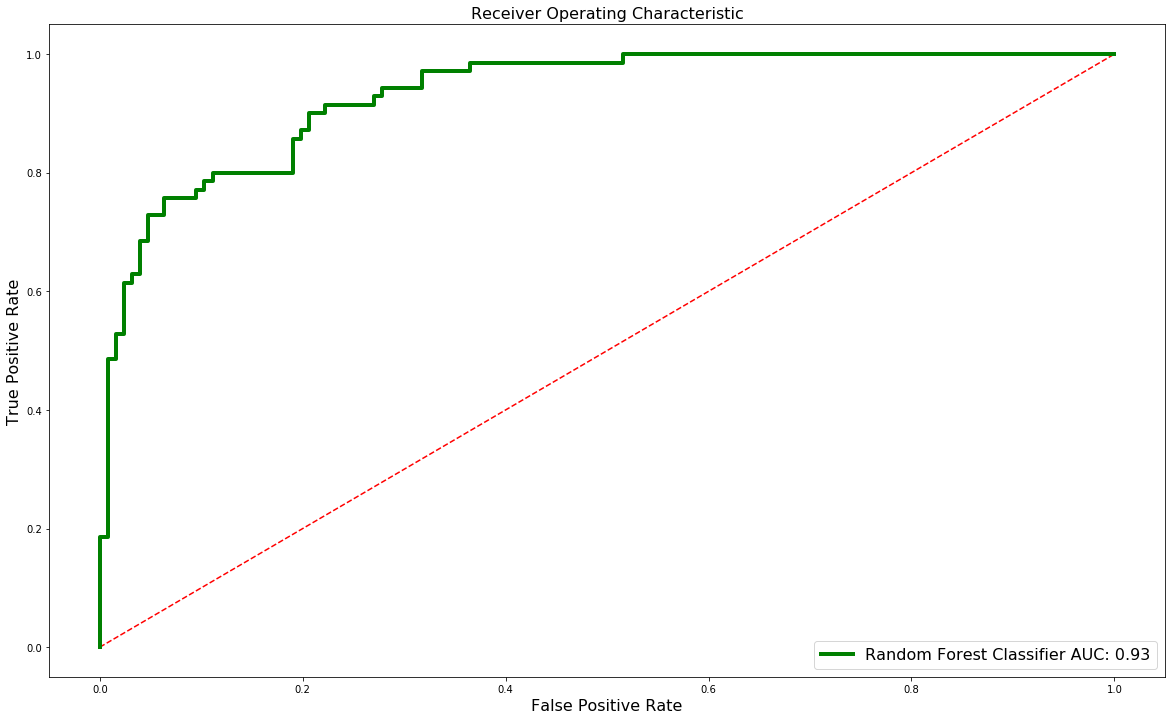

In [27]:
from sklearn.metrics import roc_curve, auc
def roc(x_train,y_train):
    plt.figure(figsize = (20, 12))
    plt.plot([0,1], [0,1], 'r--')
    probs = classifier.predict_proba(x_train)
    # Reading probability of second class (Salary >= $200K)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, probs)
    roc_auc = auc(fpr, tpr)
    
    label = 'Random Forest Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
    plt.xlabel('False Positive Rate', fontsize = 16)
    plt.ylabel('True Positive Rate', fontsize = 16)
    plt.title('Receiver Operating Characteristic', fontsize = 16)
    plt.legend(loc = 'lower right', fontsize = 16)

roc(x_train,y_train)

    
    
    
    
    

Accuracy Rate for Support Vector Classifier: 0.863265306122449


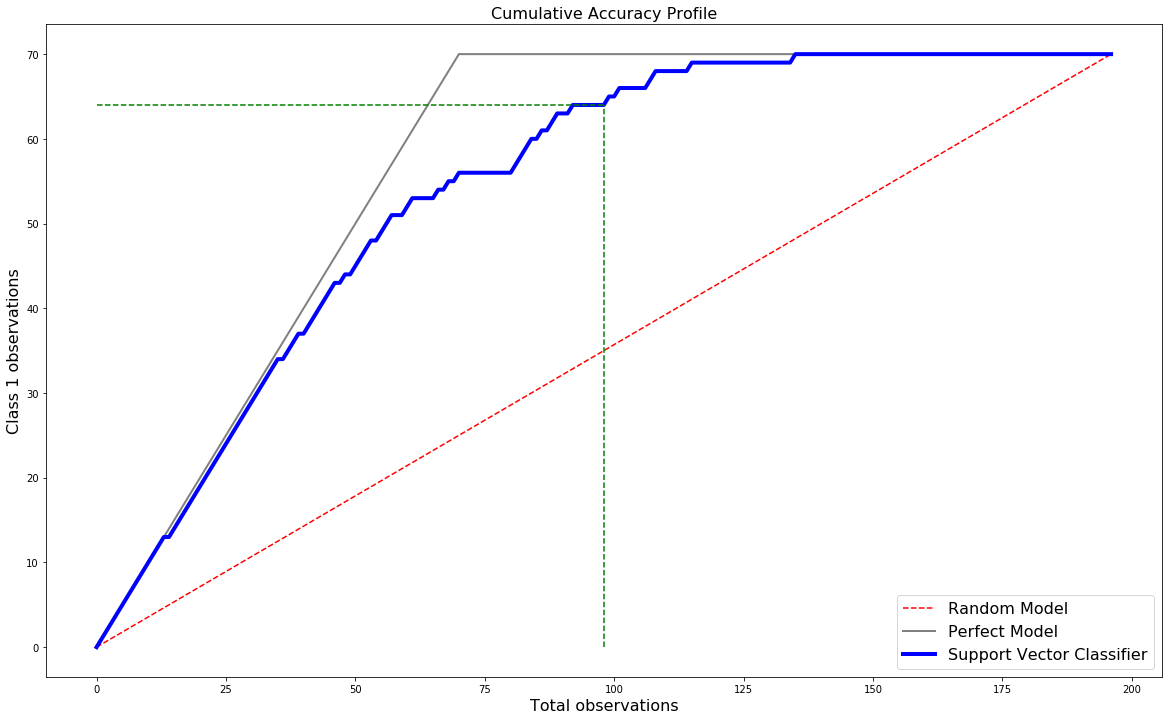

In [28]:
def cap(x_train,y_train):
    total = len(y_train)
    ## 60
    class_1_count = np.sum(y_train)
    ## 31
    class_0_count = total - class_1_count
    ## 29
    plt.figure(figsize = (20, 12))
    
    plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
    
    plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth = 2, 
         label = 'Perfect Model')
    
    probs = classifier.predict_proba(x_train)
    probs = probs[:, 1]
    model_y = [y for _, y in sorted(zip(probs, y_train), reverse = True)]
    y_values = np.append([0], np.cumsum(model_y))
    x_values = np.arange(0, total + 1)
    
    plt.plot(x_values, 
         y_values, 
         c = 'b', 
         label = 'Support Vector Classifier', 
         linewidth = 4)

    # Plot information
    plt.xlabel('Total observations', fontsize = 16)
    plt.ylabel('Class 1 observations', fontsize = 16)
    plt.title('Cumulative Accuracy Profile', fontsize = 16)
    plt.legend(loc = 'lower right', fontsize = 16)

    # Area under Random Model
    a = auc([0, total], [0, class_1_count])

    # Area between Perfect and Random Model
    aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a

    # Area between Trained and Random Model
    aR = auc(x_values, y_values) - a

    print("Accuracy Rate for Support Vector Classifier: {}".format(aR / aP))
    ## Accuracy Rate for Support Vector Classifier: 0.9688542825361512
    
    # Point where vertical line will cut trained model
    index = int((50*total / 100))

    ## 50% Verticcal line from x-axis
    plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

    ## Horizontal line to y-axis from prediction model
    plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

    class_1_observed = y_values[index] * 100 / max(y_values)

cap(x_train,y_train)